## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [2]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def get_data(data_path: str):
  data = pd.read_csv(data_path, index_col=0)
  return data

In [4]:
data = get_data(data_path='./motorbike_ambulance_calls.csv')
data.describe()

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [5]:
columns = data.columns
for column in columns:
    print(f"Max value of {column} column is {data[column].max()}")
    print(f"Min value of {column} column is {data[column].min()}")

Max value of date column is 9/9/12
Min value of date column is 1/1/11
Max value of season column is winter
Min value of season column is autumn
Max value of yr column is 1
Min value of yr column is 0
Max value of mnth column is 12
Min value of mnth column is 1
Max value of hr column is 23
Min value of hr column is 0
Max value of holiday column is 1
Min value of holiday column is 0
Max value of weekday column is 6
Min value of weekday column is 0
Max value of workingday column is 1
Min value of workingday column is 0
Max value of weathersit column is 4
Min value of weathersit column is 1
Max value of temp column is 1.0
Min value of temp column is 0.02
Max value of atemp column is 1.0
Min value of atemp column is 0.0
Max value of hum column is 1.0
Min value of hum column is 0.0
Max value of windspeed column is 0.8507
Min value of windspeed column is 0.0
Max value of cnt column is 977
Min value of cnt column is 1


In [6]:
data.shape

(17379, 14)

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 1 to 17379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        17379 non-null  object 
 1   season      17379 non-null  object 
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 2.0+ MB


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [8]:
data.isnull().sum()

date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**



1. Розмірність датасету становить 17379 рядків та 14 колонок.
2. Кількість даних по кожній змінні становить 17379, що означає що немає пропущених значень в жодній з колонок. 
   В основному в датасеті є три типи даних це float64. int64 та object
3. Жодна змінна не містить пропусків



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [9]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name])
  return df
  
data = tranform_date(data, 'date')


C:\Users\asus\AppData\Local\Temp\ipykernel_21500\3414913291.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


In [10]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")

get_time_limits(data, 'date')

First day of dataset - 2011-01-01 00:00:00.
 Last day of dataset - 2012-12-31 00:00:00


Змінна 'date' була перетворена в тип date type за допомогою функції pd.to_datetime.
Межі датасету: від 2011-01-01 до 2012-12-31

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [11]:
data_categorical = data[["season", "mnth", "yr", "hr", "holiday", "weekday", "workingday", "weathersit"]]
data_categorical

,season,mnth,yr,hr,holiday,weekday,workingday,weathersit
index,,,,,,,,
1,spring,1,0,0,0,6,0,1
2,spring,1,0,1,0,6,0,1
3,spring,1,0,2,0,6,0,1
4,spring,1,0,3,0,6,0,1
5,spring,1,0,4,0,6,0,1
...,...,...,...,...,...,...,...,...
17375,spring,12,1,19,0,1,1,2
17376,spring,12,1,20,0,1,1,2
17377,spring,12,1,21,0,1,1,1


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [12]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  values = df[season_col_name].value_counts().index

  df[season_col_name].replace(to_replace=values, value=[1,2,3,4], inplace=True)
  return df
  
data = encode_season(data, 'season')
data

,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
index,,,,,,,,,,,,,,
1,2011-01-01,3,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
2,2011-01-01,3,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
3,2011-01-01,3,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
4,2011-01-01,3,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
5,2011-01-01,3,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,3,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17376,2012-12-31,3,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17377,2012-12-31,3,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

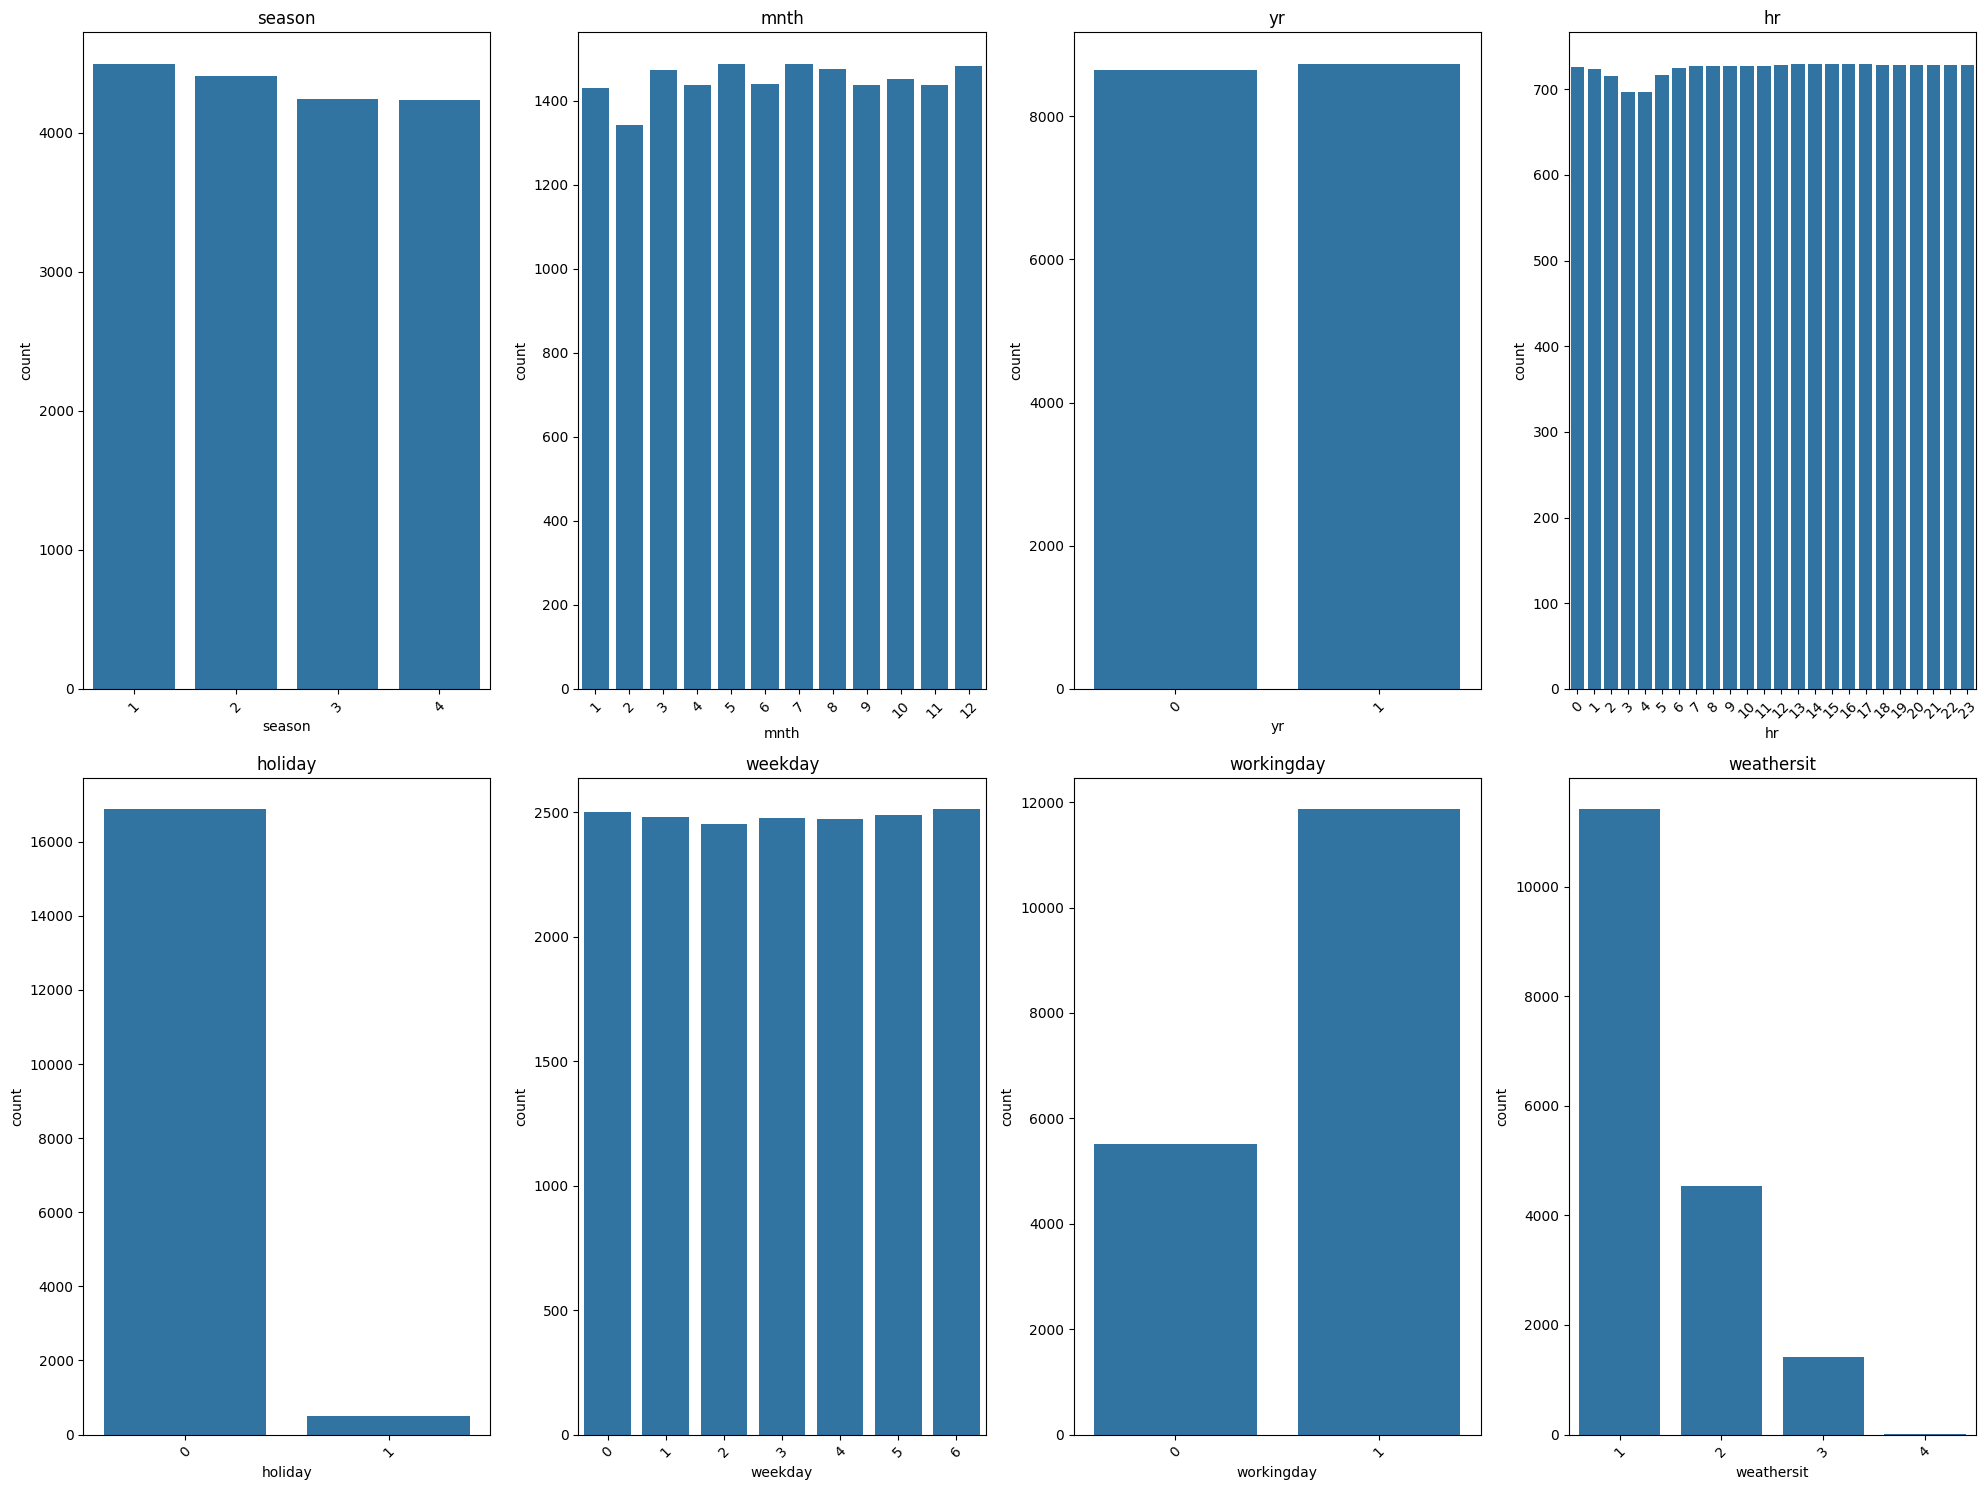

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(20, 15))
for variable, subplot in zip(data_categorical, ax.flatten()):
    sns.countplot(x=variable, data=data, ax=subplot)
    subplot.set_title(variable)
    for label in subplot.get_xticklabels():  
        label.set_rotation(45)
  

plt.tight_layout()  
plt.show()  

**Висновки з 5-7 завдання (детальні)**



1. Категоріальними зміннними є "season", "mnth", "yr", "hr", "holiday", "weekday", "workingday", "weathersit"
2. Змінна season була перетворена в числову шкалу з відповідністю: 'autumn' - 1, 'summer' - 2, 'spring' - 3, 'winter' - 4
3. По графіку 'Season' видно, що найбільша кількість викликів була здійснена осінню ('autumn - 1').
4. По графіку "Mnth (Month)" видно, що переважно кількість викликів за всі місяці однакова і знаходиться в районі 1350 - 1450.
5. По графіку "Yr (Year)" видно, що переважно кількість викликів за всі роки однакова і знаходиться в районі 7000
6. По графіку "Hr (Hour)" видно, що переважно кількість викликів протягом доби однакова, проте найменша кількість викликів з 3 по 4 години ночі.
7. По графіку "Holiday" видно, що переважно кількість викликів припадає на вихідні.
8. По графіку "Weekday" видно, що переважно кількість викликів протягом кожного дня тижня однакова.
9. По графіку "Workingday" видно, що переважно кількість викликів припадає на робочий день.
10. По графіку "Weathersit" видно, що переважно кількість викликів припадає на день, з ясною погодою.

#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [14]:
data_numerical = data.iloc[:, 9:]
data_numerical

,temp,atemp,hum,windspeed,cnt
index,,,,,
1,0.24,0.2879,0.81,0.0000,16
2,0.22,0.2727,0.80,0.0000,40
3,0.22,0.2727,0.80,0.0000,32
4,0.24,0.2879,0.75,0.0000,13
5,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...
17375,0.26,0.2576,0.60,0.1642,119
17376,0.26,0.2576,0.60,0.1642,89
17377,0.26,0.2576,0.60,0.1642,90


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

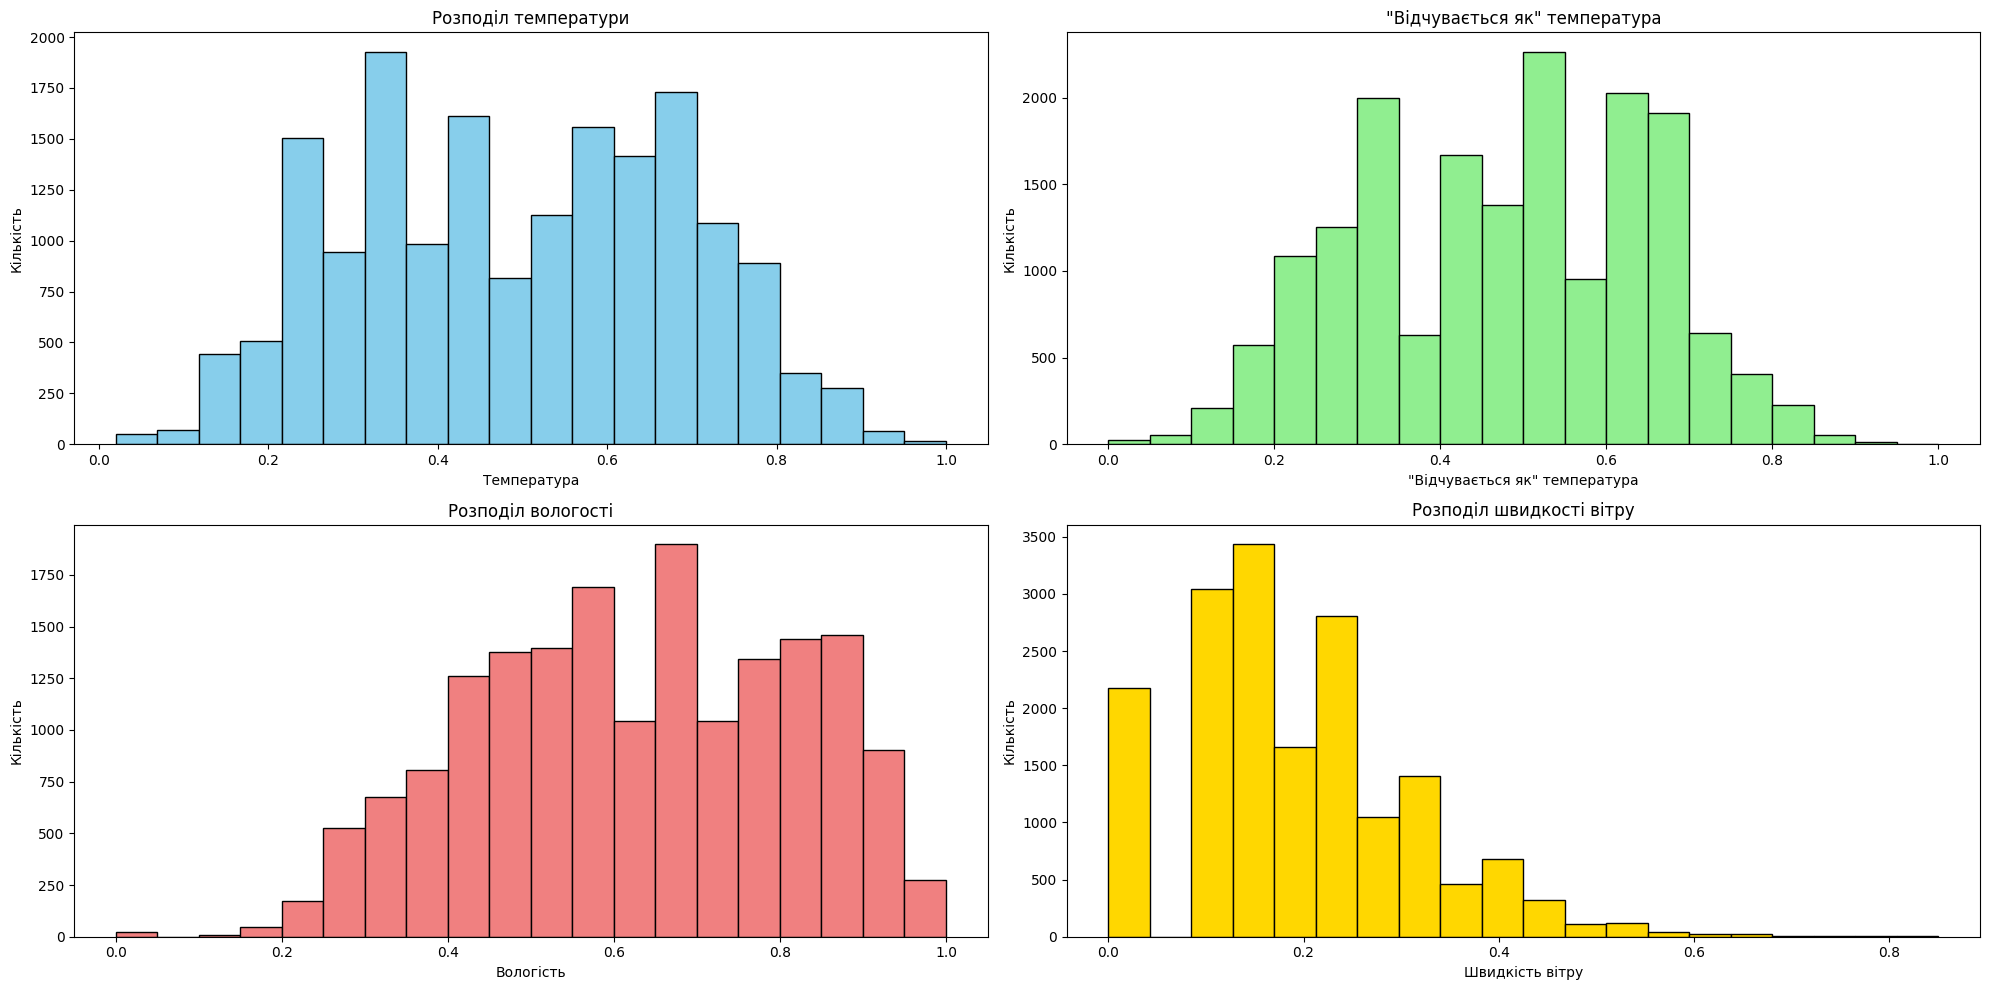

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))


ax[0, 0].hist(data_numerical['temp'], bins=20, color='skyblue', edgecolor='black')
ax[0, 0].set_title('Розподіл температури')
ax[0, 0].set_xlabel('Температура')
ax[0, 0].set_ylabel('Кількість')

ax[0, 1].hist(data_numerical['atemp'], bins=20, color='lightgreen', edgecolor='black')
ax[0, 1].set_title('"Відчувається як" температура')
ax[0, 1].set_xlabel('"Відчувається як" температура')
ax[0, 1].set_ylabel('Кількість')

ax[1, 0].hist(data_numerical['hum'], bins=20, color='lightcoral', edgecolor='black')
ax[1, 0].set_title('Розподіл вологості')
ax[1, 0].set_xlabel('Вологість')
ax[1, 0].set_ylabel('Кількість')

ax[1, 1].hist(data_numerical['windspeed'], bins=20, color='gold', edgecolor='black')
ax[1, 1].set_title('Розподіл швидкості вітру')
ax[1, 1].set_xlabel('Швидкість вітру')
ax[1, 1].set_ylabel('Кількість')

plt.tight_layout()
plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

1.2774116037490577


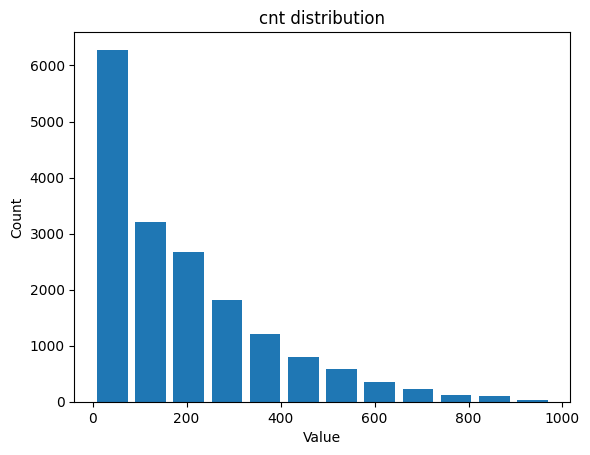

In [16]:


plt.hist(x=data['cnt'], bins=12, rwidth=0.8)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title('cnt distribution')

skewness = data['cnt'].skew()
print(skewness)


**Висновки з 8-10 завдання (детальні)**



1. Числовими змінним є: temp, atem, hum, windspeed, cnt
2. По гістограмі розподілу темепратури видно, що найвищий стовпець знаходиться приблизно при значенні 0.4 на горизонтальній осі, що означає, що цей інтервал температур має найбільшу кількість спостережень.
По гістограмі розподілу 'Відчувається як тепература' видно, що найвищий стовпець знаходиться приблизно при значенні 0.5 на горизонтальній осі, що означає, що цей інтервал температур має найбільшу кількість спостережень.
По гістограмі розподілу вологості видно, що найвищий стовпець знаходиться приблизно при значенні 0.7 на горизонтальній осі, що означає, що цей інтервал вологості має найбільшу кількість спостережень.
По гістограмі розподілу швидкості вітру видно, що найвищий стовпець знаходиться приблизно при значенні 0.2 на горизонтальній осі, що означає, що цей інтервал швидкості вітру має найбільшу кількість спостережень.
3. Коефіцієнт нахилу має значення 1,27, це свідчить про те, що розподіл даних є праворуч скошеним (праворучна асиметрія). Це означає, що більше значень знаходяться праворуч від середнього значення.



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

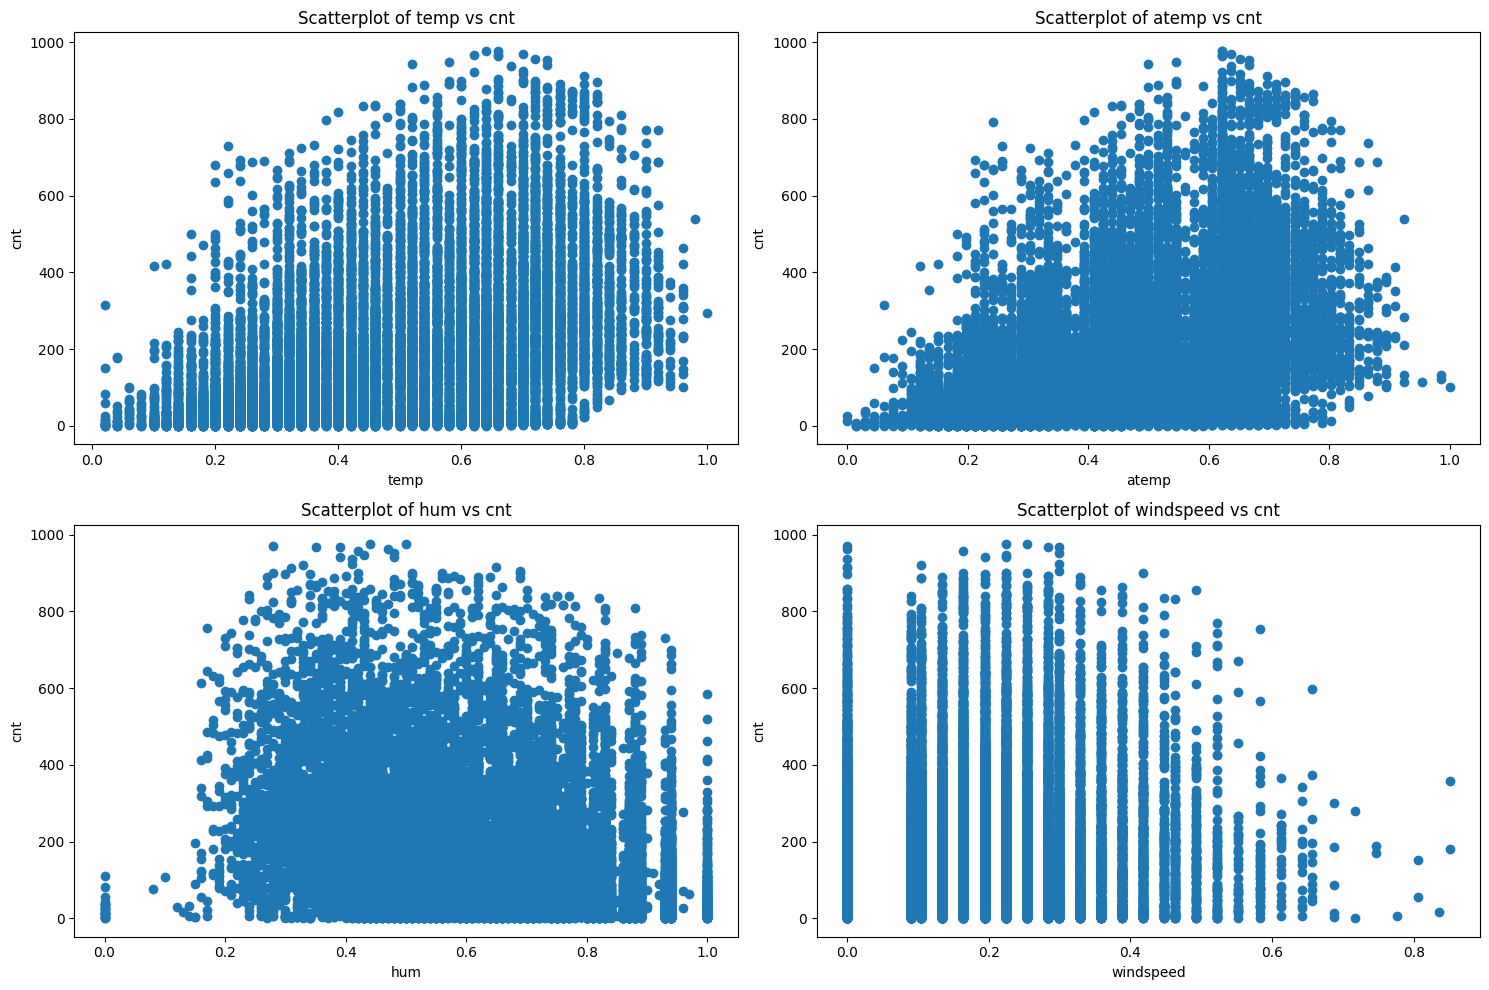

In [17]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))

for var, subplot in zip(data_numerical.drop('cnt', axis=1), ax.flatten()):
    subplot.scatter(data_numerical[var], data_numerical['cnt'])
    subplot.set_title(f'Scatterplot of {var} vs cnt')  
    subplot.set_xlabel(var)  
    subplot.set_ylabel('cnt') 

plt.tight_layout()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

C:\Users\asus\AppData\Local\Temp\ipykernel_21500\2479782311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorical_copy['cnt'] = data['cnt']


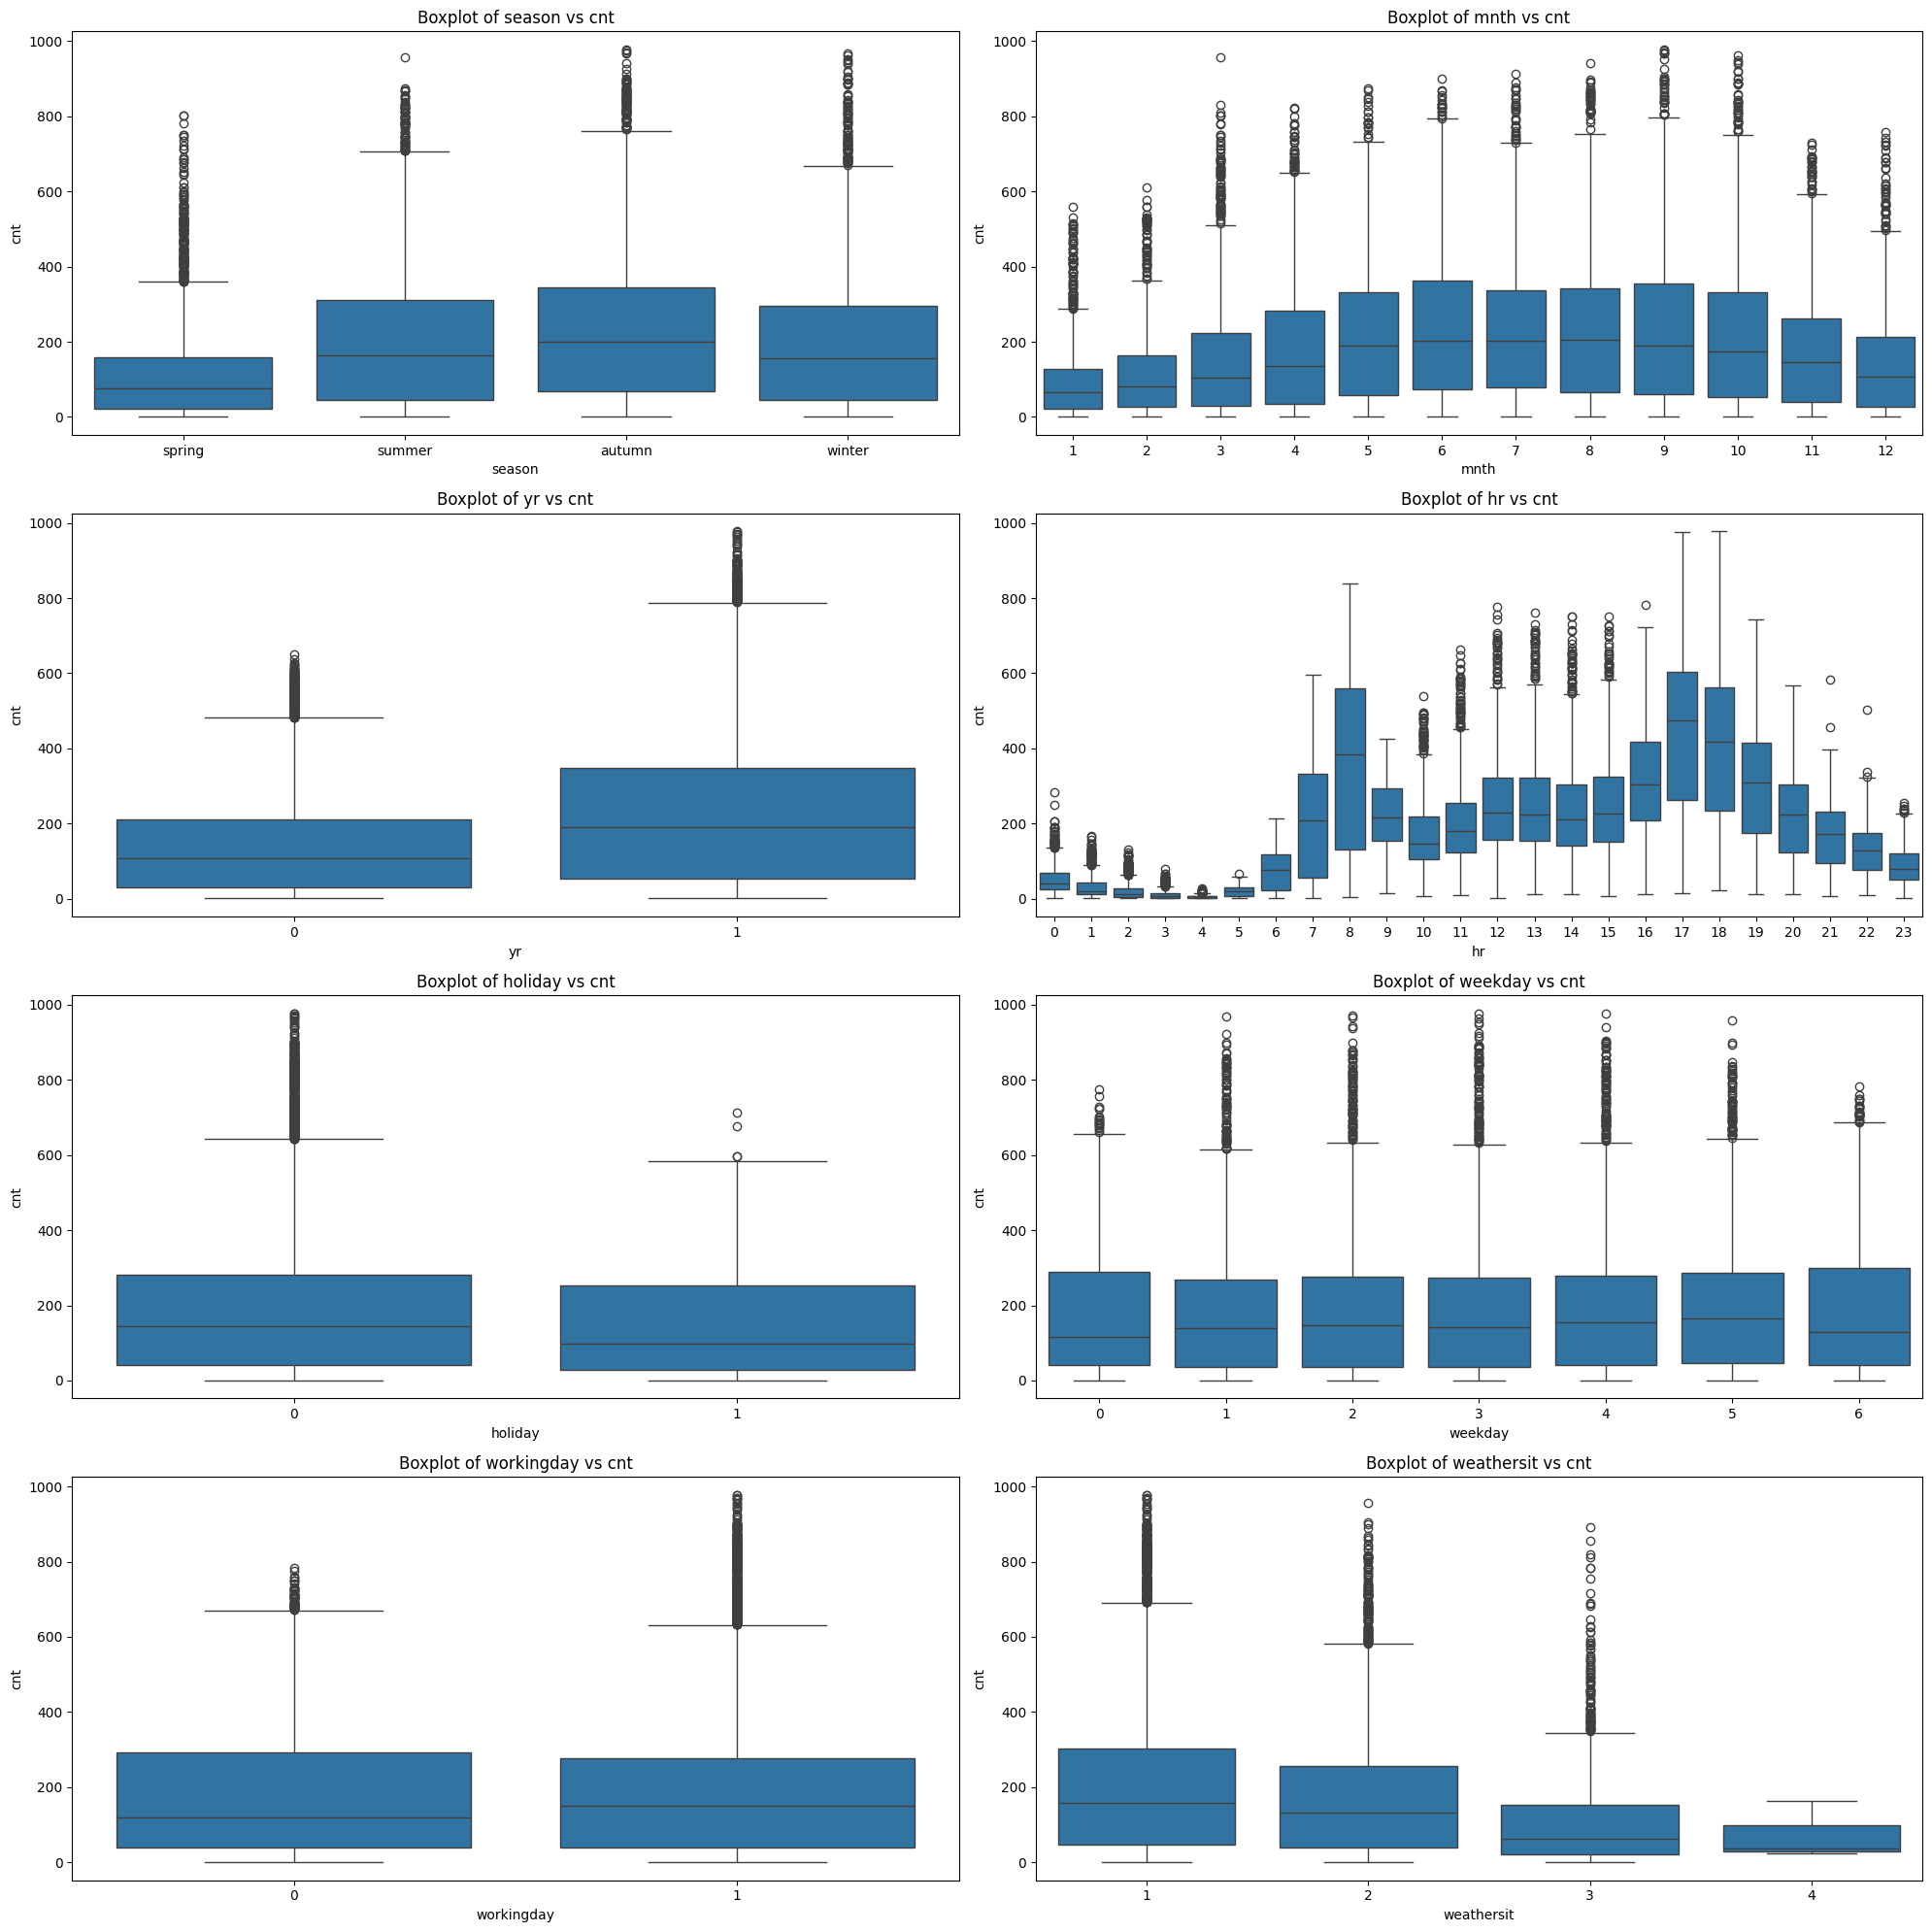

In [18]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
data_categorical_copy = data_categorical
data_categorical_copy['cnt'] = data['cnt']

for var, subplot in zip(data_categorical_copy, ax.flatten()):
    sns.boxplot(x=var, y='cnt', data=data_categorical_copy, ax=subplot)
    subplot.set_title(f'Boxplot of {var} vs cnt') 
    subplot.set_xlabel(var) 
    subplot.set_ylabel('cnt')  

plt.tight_layout()
plt.show()

**Висновки з 11-12 завдання (детальні)**



1.   На графіку видно, що існує певна позитивна тенденція між температурою (temp) та кількістю викликів (cnt). Здається, що з підвищенням температури кількість викликів також збільшується, особливо в середньому діапазоні температур. Втім, на високих температурах ця тенденція не настільки виражена.
2. Графік зіставлення відчуваної температури (atemp) з cnt виглядає дуже схоже на попередній графік з temp, що свідчить про сильну кореляцію між фактичною та відчуваною температурою.

3. Діаграма розсіювання вологості (hum) показує менш виражену кореляцію. На відміну від температури, тут не видно явної тенденції. Це може вказувати на те, що вологість має менший вплив на кількість викликів.

4. Для швидкості вітру існує цікава закономірність: рахунок, здається, зменшується при дуже високих швидкостях вітру. Це говорить про те, що до певного моменту швидкість вітру не має сильного впливу на підрахунок, але, крім цього, вона може негативно вплинути на підрахунок, ймовірно, через те, що їзда на мотоциклі менш комфортна або безпечна.




**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

Text(0.5, 1.0, 'Матриця коефіцієнтів за Спірманом')

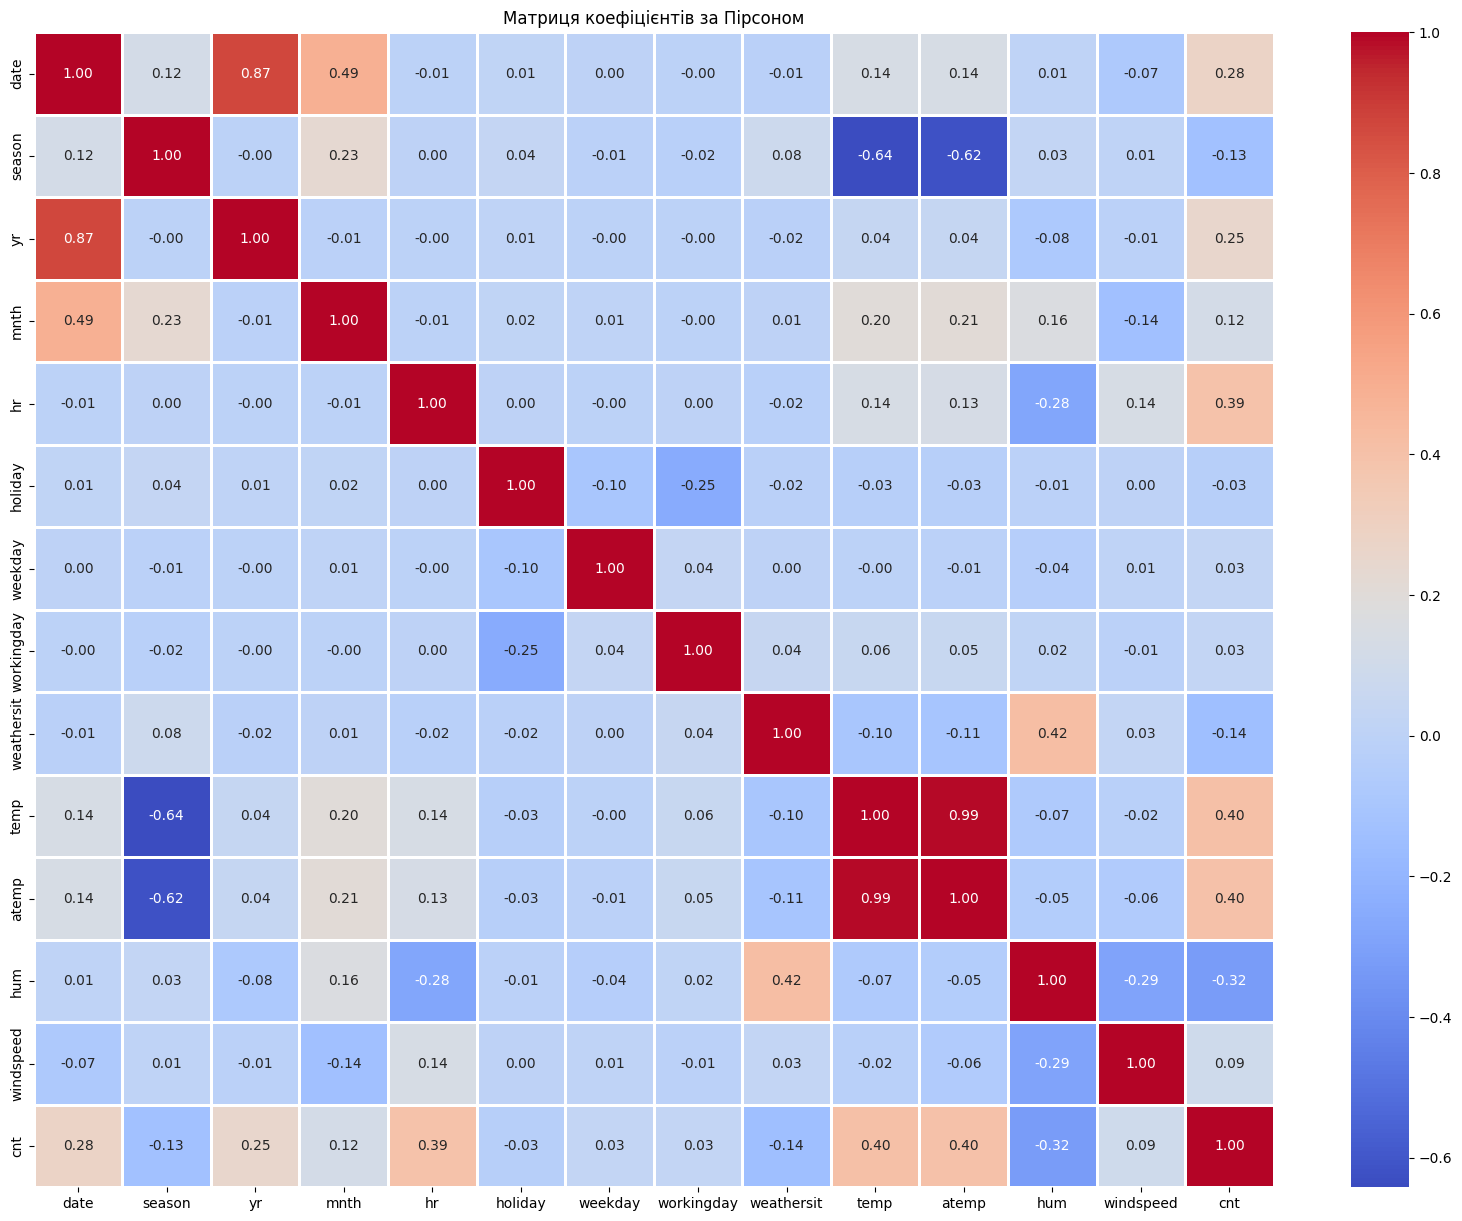

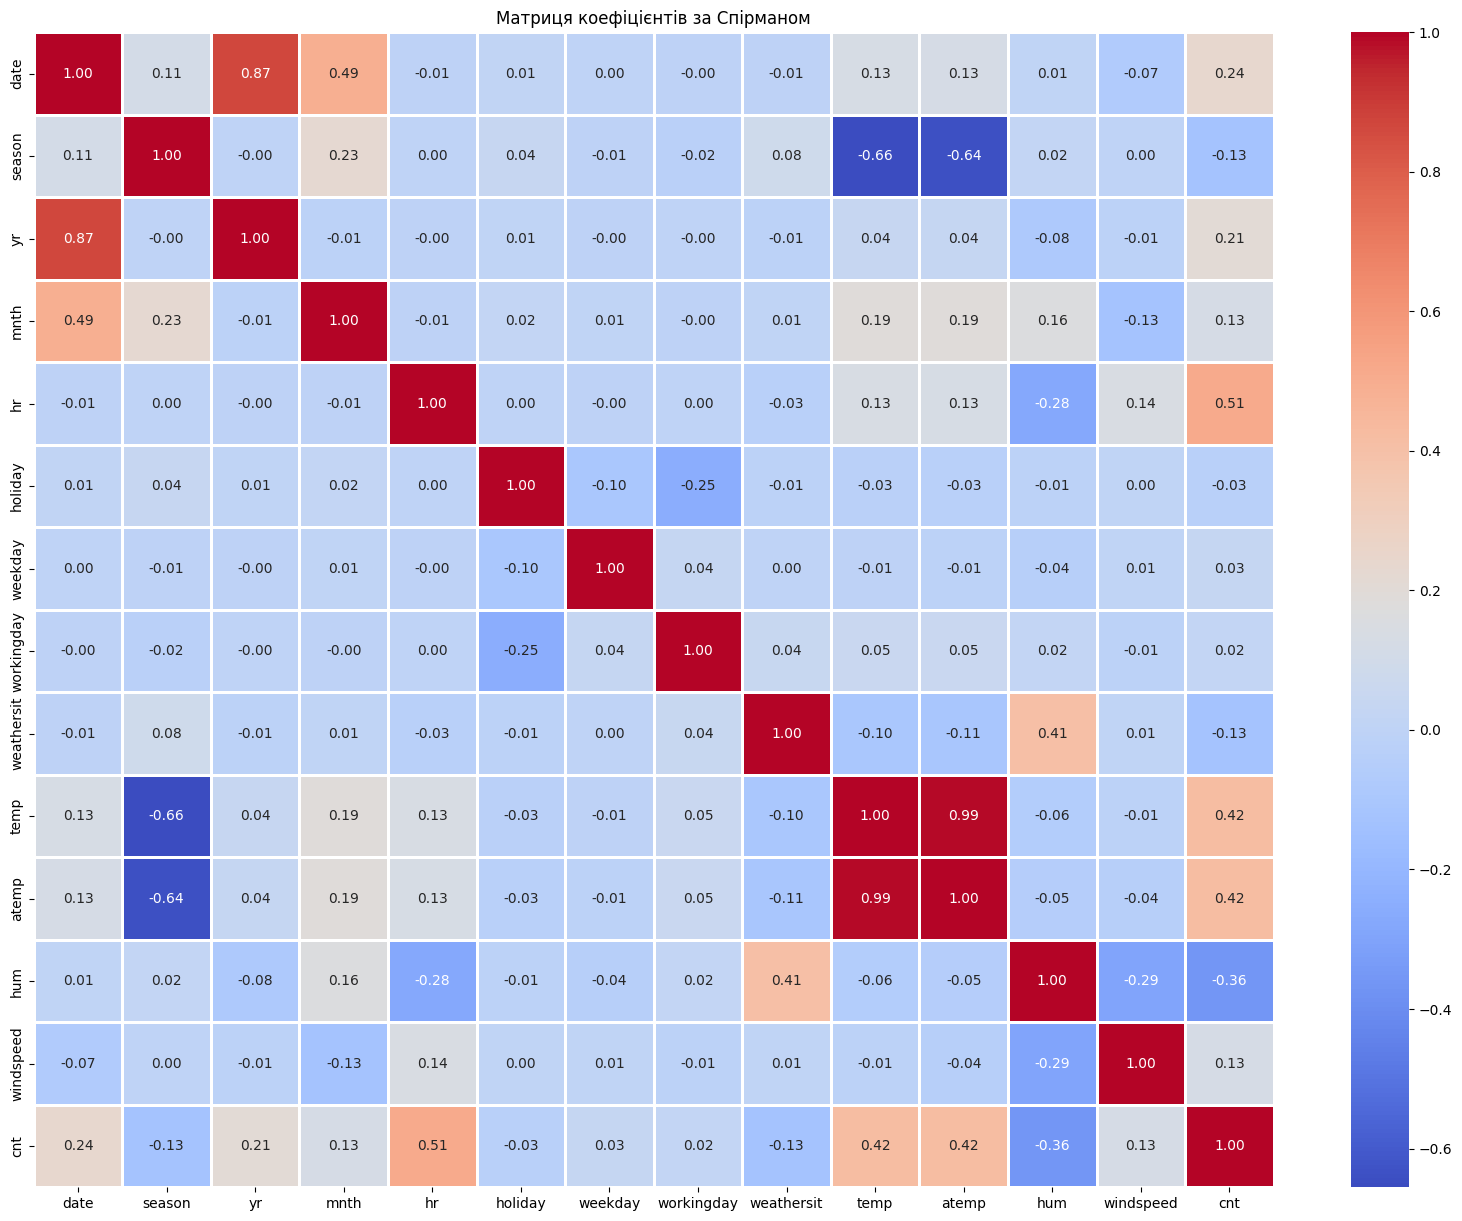

In [19]:

df = data[["season", "mnth", "hr", "weekday", "workingday", "temp", "atemp", "hum", "windspeed", 'cnt']]
coeficients_pearson = data.corr('pearson')


plt.figure(figsize=(20,15))
sns.heatmap(coeficients_pearson, annot=True, fmt=".2f", linewidths=1,  cmap='coolwarm')
plt.title("Матриця коефіцієнтів за Пірсоном")

coeficients_spearman = data.corr('spearman')


plt.figure(figsize=(20,15))
sns.heatmap(coeficients_spearman, annot=True, fmt=".2f", linewidths=1,  cmap='coolwarm')
plt.title("Матриця коефіцієнтів за Спірманом")

In [20]:
#your conclusions 

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [33]:
def get_dummies(df: pd.DataFrame):
    dummy_variables = pd.get_dummies(df[['season', 'mnth', 'weekday', 'weathersit']], drop_first=True)
    
    features = pd.concat([df, dummy_variables], axis=1)
    
    features = features.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)
    
    return features



In [34]:
features = get_dummies(data)
features

,date,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season,mnth,weekday,weathersit
index,,,,,,,,,,,,,,
1,2011-01-01,0,0,0,0,0.24,0.2879,0.81,0.0000,16,3,1,6,1
2,2011-01-01,0,1,0,0,0.22,0.2727,0.80,0.0000,40,3,1,6,1
3,2011-01-01,0,2,0,0,0.22,0.2727,0.80,0.0000,32,3,1,6,1
4,2011-01-01,0,3,0,0,0.24,0.2879,0.75,0.0000,13,3,1,6,1
5,2011-01-01,0,4,0,0,0.24,0.2879,0.75,0.0000,1,3,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,19,0,1,0.26,0.2576,0.60,0.1642,119,3,12,1,2
17376,2012-12-31,1,20,0,1,0.26,0.2576,0.60,0.1642,89,3,12,1,2
17377,2012-12-31,1,21,0,1,0.26,0.2576,0.60,0.1642,90,3,12,1,1


2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [32]:
features['night_hours'] = ((features['hr'] >= 0) & (features['hr'] <= 6)) | ((features['hr'] >= 18) & (features['hr'] <= 23)).astype(int)
features = features.drop('hr', axis = 1)
features = features[features.night_hours != 0]

KeyError: 'hr'

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [24]:
features_lr = features.drop(['atemp', 'date'], axis = 1)

In [25]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
    X = df.drop(columns=[target])  
    y = df[target]  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)

    return X_train, X_test, y_train, y_test

In [26]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [27]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [28]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 16972.700, test: 15812.637
R^2 train: 0.315, test: 0.331


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

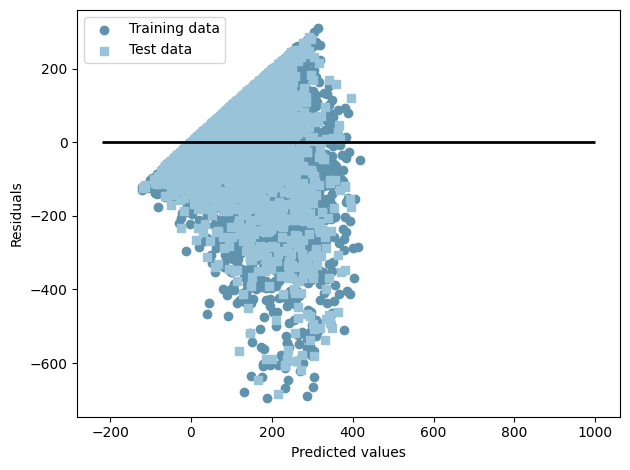

In [29]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1.   
2.   
3. ...

